

---



### 1. Путь к успеху.

Поиграйтесь с параметрами последней модели (количество нейронов, количество слоёв, вероятность dropout, количество эпох), чтобы получить Accuracy 98.5+%.


In [15]:
import torch # 5 GB! Plus we'll need GPU later (probably)
import numpy as np
np.random.seed(42)
from sklearn.model_selection import train_test_split
from torchvision import datasets
import torchvision.transforms as transforms

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 16

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# prepare data loaders for stochastic gradient descent
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
    num_workers=num_workers)


In [16]:
import torch.nn as nn
import torch.nn.functional as F

## TODO: Define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # linear layer (784 -> 1 hidden node)
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(p=0.2) # google it

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x

# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [19]:
from tqdm import tqdm
## TODO: Specify loss and optimization functions

# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.05) # Try lr=0.05 and n_epochs=1

# number of epochs to train the model
n_epochs = 20  # suggest training between 20-50 epochs

model.train() # prep model for training (enables dropout)

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0

    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)

    # print training statistics
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1,
        train_loss
        ))

Epoch: 1 	Training Loss: 0.341757
Epoch: 2 	Training Loss: 0.128052
Epoch: 3 	Training Loss: 0.089446
Epoch: 4 	Training Loss: 0.070966
Epoch: 5 	Training Loss: 0.057180
Epoch: 6 	Training Loss: 0.048081
Epoch: 7 	Training Loss: 0.040721
Epoch: 8 	Training Loss: 0.033136
Epoch: 9 	Training Loss: 0.030679
Epoch: 10 	Training Loss: 0.025299
Epoch: 11 	Training Loss: 0.021684
Epoch: 12 	Training Loss: 0.021146
Epoch: 13 	Training Loss: 0.017874
Epoch: 14 	Training Loss: 0.014945
Epoch: 15 	Training Loss: 0.015694
Epoch: 16 	Training Loss: 0.015402
Epoch: 17 	Training Loss: 0.012808
Epoch: 18 	Training Loss: 0.011771
Epoch: 19 	Training Loss: 0.011710
Epoch: 20 	Training Loss: 0.011307


In [20]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for *evaluation*

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.067166

Test Accuracy of     0: 99% (974/980)
Test Accuracy of     1: 99% (1127/1135)
Test Accuracy of     2: 98% (1018/1032)
Test Accuracy of     3: 98% (993/1010)
Test Accuracy of     4: 98% (968/982)
Test Accuracy of     5: 98% (876/892)
Test Accuracy of     6: 98% (946/958)
Test Accuracy of     7: 97% (1005/1028)
Test Accuracy of     8: 96% (939/974)
Test Accuracy of     9: 97% (984/1009)

Test Accuracy (Overall): 98% (9830/10000)


### 2. Метрики качества.

Для любой из цифр постройте confusion matrix итоговой модели. Определите accuracy, precison и recall в классификации этой цифры.

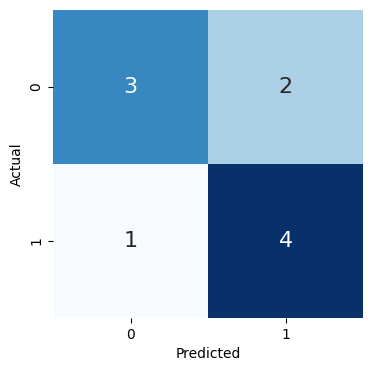

Accuracy: 0.7
Precision: 0.6666666666666666
Recall: 0.8


In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Предположим, y_true - фактические значения, y_pred - предсказанные значения вашей модели
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]  # Пример: классификация 1 и 0
y_pred = [1, 0, 1, 0, 0, 1, 1, 1, 1, 0]

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Вычисление метрик
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


### 3. Медицинский тест как классификатор.


Медицинские тесты, диагностирующие болезни, являются бинарными классификаторами.  Они характеризуются следующими параметрами:

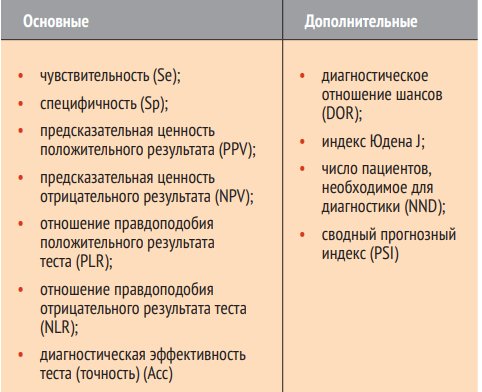

Чувствительность (Sensitivity, сокр. Se, иногда Sn): вероятность того, что результат теста будет положительным при наличии заболевания (англ. True positive rate, TPR).


$\mathrm{TPR}=\mathrm{TP} /(\mathrm{TP}+\mathrm{FN})$.

Специфичность (Specificity, сокр. Sp): вероятность того, что результат теста будет отрицательным при отсутствии заболевания (англ. True negative rate, TNR).

$TNR = TN / (\mathrm{TN}+\mathrm{FP})$.

Предсказательная ценность положительного результата (Positive predictive value, сокр. РPV): вероятность того, что заболевание присутствует, когда тест положительный.

$\mathrm{PPV}=\mathrm{TP} /(\mathrm{TP}+\mathrm{FP})$.

Предсказательная ценность отрицательного результата (Negative predictive value, сокр. NPV): вероятность того, что заболевание отсутствует, когда тест отрицательный.

$\mathrm{NPV}=\mathrm{TN} /(\mathrm{TN}+\mathrm{FN})$.

Отношение правдоподобия положительного результата теста (Positive likelihood ratio, сокр. LR+ или $\mathrm{LR}^{+}, \mathrm{plr}$ ): отношение между вероятностью положительного результата теста при наличии заболевания (TPR) и вероятностью положительного результата теста при отсутствии заболевания (False positive rate - FPR), т. е. TPR/FPR или

$$
Se / (1-\mathrm{Sp}).
$$

Отношение правдоподобия отрицательного результата теста (Negative likelihood ratio, сокр. LR-, LR-, nlr): отношение вероятности отрицательного результата теста при наличии заболевания (False negative rate - FNR) и вероятности отрицательного результата теста при отсутствии заболевания (TNR), т. е.

$$
FNR/TNR = (1-Se) / Sp.
$$

Диагностическая эффективность теста или точность (англ. Accuracy, сокр. Асc): общая вероятность того, что пациент будет правильно классифицирован, определяется как доля всех тестов, которые дают правильный результат.

$$
(TP + TN) / (TP + TN + FP +FN).
$$

Диагностическое отношение шансов (Diagnostic odds ratio - DOR) - отношение шансов теста быть положительным, если у субъекта заболевание, к шансам теста быть положительным, если у субъекта нет заболевания.

$$
DOR = (TP/FP) / (FN/TN).
$$

Индекс Юдена J (Youden's index) - это разница между TRP и FPR (долей истинно положительных результатов (чувствительностью теста) и долей ложноположительных результатов). Чем больше это различие, тем лучше работает диагностическая технология. Так как FPR - это 1-TNR, TRP - это Se, TNR - это Sp, то, соответственно,

$$
\mathrm{J}=\mathrm{TRP}-\mathrm{FPR}=\mathrm{TRP}-(1-\mathrm{TNR})=\mathrm{TRP}-1+\mathrm{TNR}=\mathrm{Se}+\mathrm{Sp}-1.
$$

Число, необходимое для диагностики (The number needed to diagnose, сокр. NND), вычисляется путем инверсии индекса Юдена (1/J) и определяется как число пациентов, которые должны быть протестированы, чтобы получить один правильный, т. е. истинно положительный, тест (результат теста). Для диагностических тестов будут желательны малые значения NND.

Сводный прогнозный индекс (англ. predictive summary index, PSI) отражает общий выигрыш в уверенности в болезни от выполнения диагностического теста:

$$
 \mathrm{PSI}=\mathrm{PPV}+ NPV-1.
$$

Обратная величина PSI предлагается как число пациентов, которые должны быть обследованы, чтобы правильно предсказать диагноз заболевания.

Кажущаяся распространенность болезни среди пациентов, участвующих в исследовании (англ. Apparent prevalence, сокр. aprev): общая вероятность того, что результат теста на наличие заболевания будет положительным относительно всех проведенных тестов.

$Aprev = (TP + \mathrm{FP}) /(\mathrm{TP}+\mathrm{TN}+\mathrm{FP}+\mathrm{FN})$.

Истинная распространенность болезни среди пациентов, участвующих в исследовании (англ. True prevalence, coкp. tprev): общая вероятность наличия заболевания относительно всех проведенных тестов.


$Tprev = (TP + FN) / (T P+T N+F P+F N)$.

По данным из таблицы определите все перечисленные параметры выше и  ответьте на поставленные вопросы
$$
\begin{array}{|c|c|c|c|c|}
\hline & & {\begin{array}{c}
\text { Клинический диагноз } \\
\text { стрептококковой ангины }
\end{array}} & \\
 & & \text { присутствует } & \text { отсутствует } & \\
\hline {\begin{array}{c}
\text { в-гемолитический } \\
\text { стрептококк в } \\
\text { посеве мазка }
\end{array}} & \text { да } & 27 & 35 & \\
 & \text { нет } & 10 & 77 & \\
\hline & & & & \\
\hline
\end{array}
$$
a) Какова вероятность того, что у больного ангиной в мазке будет обнаружен стрептококк ?

b) Какова вероятность того, что стрептококк будет обнаружен в мазке пациента, не болеющего стрептококковой ангиной ?

с) Какова вероятность того, что у пациента, не болеющего стрептококковой ангиной, не будет обнаружен стрептококк в мазке ?

d) Какова вероятность того, что пациент, у которого обнаружен в мазке стрептококк, болен ангиной ?

е) Какова вероятность того, что пациент, у которого не обнаружен в мазке стрептококк, не болен ангиной ?

f) Какие показатели соответствуют a) и b) ?

g) Какие показатели соответствуют d) и е) ?


In [37]:
TP = 27
TN = 77
FP = 35
FN = 10

Se = TP / (TP + FN)  # Чувствительность
Sp = TN / (TN + FP)  # Специфичность
NPV = TN / (TN + FN)  # Предсказательная ценность отрицательного результата
PPV = TP / (TP + FP)  # Предсказательная ценность положительного результата
Negative_Accuracy = TN / (TN + FP)  # Точность (Negative Accuracy)
Youden_Index = Se + Sp - 1  # Индекс Юдена
NND = 1 / Youden_Index  # Обратное число, необходимое для диагностики
DOR = (TP / FP) / (FN / TN)  # Диагностическое отношение шансов
PSI = PPV + NPV - 1  # Сводный прогнозный индекс
Aprev = (TP + FP) / (TP + TN + FP + FN)  # Кажущаяся распространенность болезни
Tprev = (TP + FN) / (TP + TN + FP + FN)  # Истинная распространенность болезни

print("Чувствительность (Se):", Se)
print("Специфичность (Sp):", Sp)
print("Предсказательная ценность отрицательного результата (NPV):", NPV)
print("Предсказательная ценность положительного результата (PPV):", PPV)
print("Точность (Negative Accuracy):", Negative_Accuracy)
print("Индекс Юдена (Youden's Index):", Youden_Index)
print("Обратное число, необходимое для диагностики (NND):", NND)
print("Диагностическое отношение шансов (DOR):", DOR)
print("Сводный прогнозный индекс (PSI):", PSI)
print("Кажущаяся распространенность болезни (Aprev):", Aprev)
print("Истинная распространенность болезни (Tprev):", Tprev)


Чувствительность (Se): 0.7297297297297297
Специфичность (Sp): 0.6875
Предсказательная ценность отрицательного результата (NPV): 0.8850574712643678
Предсказательная ценность положительного результата (PPV): 0.43548387096774194
Точность (Negative Accuracy): 0.6875
Индекс Юдена (Youden's Index): 0.4172297297297298
Обратное число, необходимое для диагностики (NND): 2.3967611336032384
Диагностическое отношение шансов (DOR): 5.94
Сводный прогнозный индекс (PSI): 0.3205413422321097
Кажущаяся распространенность болезни (Aprev): 0.4161073825503356
Истинная распространенность болезни (Tprev): 0.2483221476510067


Все посчитано выше

a) Вероятность того, что у больного ангиной в мазке будет обнаружен стрептококк
Se = TP / (TP + FN)

b) Вероятность того, что стрептококк будет обнаружен в мазке пациента, не болеющего стрептококковой ангиной
Sp = TN / (TN + FP)

с) Вероятность того, что у пациента, не болеющего стрептококковой ангиной, не будет обнаружен стрептококк в мазке
NPV = TN / (TN + FN)

d) Вероятность того, что пациент, у которого обнаружен в мазке стрептококк, болен ангиной
PPV = TP / (TP + FP)

е) Вероятность того, что пациент, у которого не обнаружен в мазке стрептококк, не болен ангиной
Negative_Accuracy = TN / (TN + FP)

Ответы на f),g) даны выше

###  5. Метод k-ближайших соседей (k-nearest neighbors algorithm, k-NN) для ирисов Фишера.



*диаграмма, что-то не уместилась*

Также можно посмотреть этот набор в Википедии [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0).

Используйте евклидову метрику на нормализованных данных по всем 4-м признакам.

$$
x_i \equiv \frac{x_i-\bar{x}}{s}
$$

$$
\bar{x}=\frac{1}{n} \sum_{i=1}^n x_i
$$


$$
\mathrm{s}=\cdot \sqrt{\frac{1}{n-1} \sum_{i=1}^n\left(x_i-\bar{x}\right)^2}
$$

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html  - реализовано здесь.

- Поочередно рассматривайте каждый цветок, считая его тип неизвестным, а типы всех остальных цветков известными, и определите для каждого цветка, правильно определён тип цветка или неправильно.

- Постройте зависимость количества правильно определённых цветков от k.

- При каком k максимальное количество правильно определённых по типу цветков?


Указания к выполнению:

- можно реализовывать вручную, а можно с помощью библиотеки https://scikit-learn.ru/1-6-nearest-neighbors/

- на Хабре есть статья про kNN на примере ирисов Фишера https://habr.com/ru/articles/680004/, можете использовать куски кода оттуда, если возникают проблемы с реализацией

- также в папке семинара есть файл с лекцией МФТИ по kNN алгоритму и там тоже сделана реализация под ирисы Фишера. Код можно использовать для решения предложенной задачи.


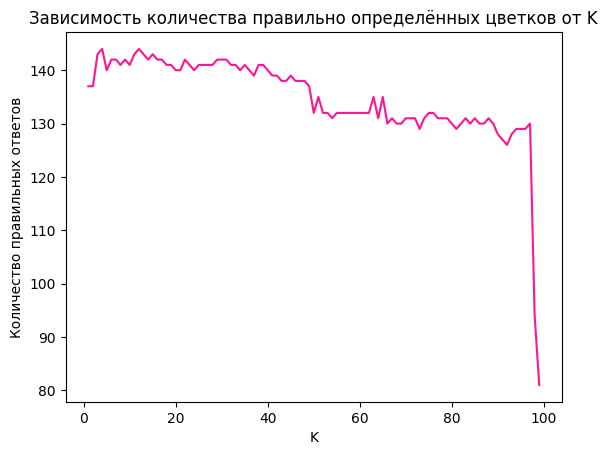

In [6]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

iris_dataset = load_iris()
x = []
y = []

for n in range(1, 100): #создается модель k-ближайших соседей
    knn = KNeighborsClassifier(n_neighbors=n)
    predictions = np.array([])

    for i in range(len(iris_dataset.target)):
        #создается тренировочный набор данных путем исключения текущего объекта
        first = np.array(iris_dataset.data[:, [0, 2]][:i])
        second = np.array(iris_dataset.data[:, [0, 2]][i + 1:])
        x_train = np.concatenate((first, second), axis=0) 

        first = np.array(iris_dataset.target[:i])
        second = np.array(iris_dataset.target[i + 1:])
        y_train = np.concatenate((first, second), axis=0)

        #создается тестовый набор данных для текущего объекта.
        x_test = np.array(iris_dataset.data[:, [0, 2]][i])
        x_test = np.reshape(x_test, (1, -1))
        y_test = np.array(iris_dataset.target[i])

        #модель KNN обучается на тренировочном наборе, и делается предсказание для тестового объекта.
        knn_model = knn.fit(x_train, y_train)
        predictions = np.append(predictions, knn.predict(x_test))

    counter = 0
    for i in range(len(predictions)):
        if predictions[i] == iris_dataset.target[i]:
            counter += 1

    x.append(n)
    y.append(counter)

plt.title('Зависимость количества правильно определённых цветков от K')
plt.plot(x, y, 'deeppink')
plt.xlabel('K')
plt.ylabel('Количество правильных ответов')
plt.show()
